# SCVIC dataset import

In [1]:
# imports
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import datetime as dt

# data manipulation
import pandas as pd
import numpy as np

# data viz
#from dython.nominal import associations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [2]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing SCVIC2021 data

%cd /content/drive/MyDrive/Colab Notebooks/

train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

/content/drive/MyDrive/Colab Notebooks


In [4]:
dataset = pd.concat([train, test])

# SCVIC dataset exploratory data analysis (EDA)

## Timestamp tests

In [5]:
dataset.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.28.128.11-172.28.128.10-49331-389-6,172.28.128.11,49331,172.28.128.10,389,6,2015-10-21 09:54:02,4975,11,32,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
1,172.28.128.11-172.28.128.10-49332-389-6,172.28.128.11,49332,172.28.128.10,389,6,2015-10-21 09:54:02,4110,9,7,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
2,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2015-10-21 09:54:25,1671818,3,0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
3,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2015-10-21 09:57:10,1672538,3,0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
4,172.28.128.10-172.28.128.255-137-137-17,172.28.128.10,137,172.28.128.255,137,17,2015-10-21 09:54:20,2281415,4,0,...,8,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic


In [46]:
dataset.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [47]:
dataset = dataset.reindex(sorted(dataset.columns), axis=1)

In [48]:
dataset.columns

Index(['ACK Flag Count', 'Active Max', 'Active Mean', 'Active Min',
       'Active Std', 'Average Packet Size', 'Bwd Bulk Rate Avg',
       'Bwd Bytes/Bulk Avg', 'Bwd Header Length', 'Bwd IAT Max',
       'Bwd IAT Mean', 'Bwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Total',
       'Bwd Init Win Bytes', 'Bwd PSH Flags', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Min',
       'Bwd Packet Length Std', 'Bwd Packet/Bulk Avg', 'Bwd Packets/s',
       'Bwd Segment Size Avg', 'Bwd URG Flags', 'CWR Flag Count',
       'Down/Up Ratio', 'Dst IP', 'Dst Port', 'ECE Flag Count',
       'FIN Flag Count', 'FWD Init Win Bytes', 'Flow Bytes/s', 'Flow Duration',
       'Flow IAT Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Std',
       'Flow ID', 'Flow Packets/s', 'Fwd Act Data Pkts', 'Fwd Bulk Rate Avg',
       'Fwd Bytes/Bulk Avg', 'Fwd Header Length', 'Fwd IAT Max',
       'Fwd IAT Mean', 'Fwd IAT Min', 'Fwd IAT Std', 'Fwd IAT Total',
       'Fwd PSH Flags', 'Fwd Packet 

In [53]:
dataset[dataset['Label'] != 'NormalTraffic']['Average Packet Size'].describe()

count    5188.000000
mean      246.865609
std       364.791426
min         0.000000
25%        75.600000
50%       123.079365
75%       296.490000
max      4208.000000
Name: Average Packet Size, dtype: float64

In [6]:
train.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.28.128.11-172.28.128.10-49331-389-6,172.28.128.11,49331,172.28.128.10,389,6,2015-10-21 09:54:02,4975,11,32,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
1,172.28.128.11-172.28.128.10-49332-389-6,172.28.128.11,49332,172.28.128.10,389,6,2015-10-21 09:54:02,4110,9,7,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
2,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2015-10-21 09:54:25,1671818,3,0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
3,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2015-10-21 09:57:10,1672538,3,0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
4,172.28.128.10-172.28.128.255-137-137-17,172.28.128.10,137,172.28.128.255,137,17,2015-10-21 09:54:20,2281415,4,0,...,8,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic


In [7]:
train.tail()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
259115,192.168.88.61-192.168.88.1-949-53-17,192.168.88.61,949,192.168.88.1,53,17,10/21/2015 23:59,4003201,3,3,...,8,0.0,0.0,0.0,0.0,1.450000e+15,0.0,1.450000e+15,1.450000e+15,NormalTraffic
259116,10.10.10.20-10.10.10.10-49156-102-6,10.10.10.20,49156,10.10.10.10,102,6,10/21/2015 23:59,4057020,20,10,...,20,0.0,0.0,0.0,0.0,1.450000e+15,0.0,1.450000e+15,1.450000e+15,NormalTraffic
259117,192.168.88.61-192.168.88.1-949-53-17,192.168.88.61,949,192.168.88.1,53,17,10/21/2015 23:59,4003254,3,3,...,8,0.0,0.0,0.0,0.0,1.450000e+15,0.0,1.450000e+15,1.450000e+15,NormalTraffic
259118,10.10.10.20-10.10.10.10-49156-102-6,10.10.10.20,49156,10.10.10.10,102,6,10/21/2015 23:59,4043435,20,10,...,20,0.0,0.0,0.0,0.0,1.450000e+15,0.0,1.450000e+15,1.450000e+15,NormalTraffic
259119,192.168.88.61-192.168.88.1-949-53-17,192.168.88.61,949,192.168.88.1,53,17,10/21/2015 23:59,4003434,3,3,...,8,0.0,0.0,0.0,0.0,1.450000e+15,0.0,1.450000e+15,1.450000e+15,NormalTraffic


## Understanding the big picture

In [8]:
dataset.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.28.128.11-172.28.128.10-49331-389-6,172.28.128.11,49331,172.28.128.10,389,6,2015-10-21 09:54:02,4975,11,32,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
1,172.28.128.11-172.28.128.10-49332-389-6,172.28.128.11,49332,172.28.128.10,389,6,2015-10-21 09:54:02,4110,9,7,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
2,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2015-10-21 09:54:25,1671818,3,0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
3,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2015-10-21 09:57:10,1672538,3,0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
4,172.28.128.10-172.28.128.255-137-137-17,172.28.128.10,137,172.28.128.255,137,17,2015-10-21 09:54:20,2281415,4,0,...,8,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic


In [9]:
dataset.tail()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
56482,192.168.88.1-192.168.88.61-53-949-17,192.168.88.1,53,192.168.88.61,949,17,10/20/2015 23:59,4003079,4,2,...,8,0.0,0.0,0.0,0.0,1.445400e+15,0.0,1.445400e+15,1.445400e+15,NormalTraffic
56483,10.10.10.20-10.10.10.10-49156-102-6,10.10.10.20,49156,10.10.10.10,102,6,10/20/2015 23:59,4987049,21,9,...,20,0.0,0.0,0.0,0.0,1.445400e+15,0.0,1.445400e+15,1.445400e+15,NormalTraffic
56484,10.10.10.20-10.10.10.10-49156-102-6,10.10.10.20,49156,10.10.10.10,102,6,10/20/2015 23:59,4999507,21,11,...,20,0.0,0.0,0.0,0.0,1.445400e+15,0.0,1.445400e+15,1.445400e+15,NormalTraffic
56485,192.168.88.1-192.168.88.61-53-949-17,192.168.88.1,53,192.168.88.61,949,17,10/20/2015 23:59,4003151,4,2,...,8,0.0,0.0,0.0,0.0,1.445400e+15,0.0,1.445400e+15,1.445400e+15,NormalTraffic
56486,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,10/20/2015 23:59,0,2,0,...,0,0.0,0.0,0.0,0.0,1.445400e+15,0.0,1.445400e+15,1.445400e+15,NormalTraffic


In [10]:
train.shape

(259120, 84)

In [11]:
test.shape

(56487, 84)

In [12]:
dataset.shape

(315607, 84)

In [13]:
dataset.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,315607.000000,315607.000000,315607.000000,3.156070e+05,315607.000000,315607.000000,315607.000000,3.156070e+05,315607.000000,315607.000000,...,315607.000000,315607.000000,3.156070e+05,315607.0,3.156070e+05,3.156070e+05,3.156070e+05,3.156070e+05,3.156070e+05,3.156070e+05
mean,42127.864062,4557.894239,8.011549,1.235433e+06,5.018260,2.791088,382.966959,3.276003e+02,55.854937,22.375267,...,2.110124,19.688258,1.734554e+03,0.0,1.734554e+03,1.734554e+03,1.458899e+15,3.348518e+13,1.482651e+15,1.435198e+15
std,20397.839734,10614.611688,4.881560,1.924172e+06,24.543281,9.069982,3787.799204,6.661537e+03,393.052236,119.355027,...,22.712454,10.776810,3.447434e+04,0.0,3.447434e+04,3.447434e+04,1.446039e+14,1.878045e+14,7.666932e+13,2.669696e+14
min,0.000000,0.000000,0.000000,-1.372120e+05,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,7.230000e+11,0.000000e+00,1.450000e+12,3.000094e+06
25%,38686.000000,102.000000,6.000000,6.120000e+02,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15
50%,49340.000000,102.000000,6.000000,4.612000e+03,2.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15
75%,56128.500000,4466.000000,6.000000,3.005705e+06,3.000000,2.000000,120.000000,6.200000e+01,31.000000,1.000000,...,0.000000,20.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15
max,65535.000000,65389.000000,17.000000,5.000000e+06,1351.000000,2291.000000,175604.000000,3.126149e+06,32768.000000,24320.000000,...,1346.000000,44.000000,1.846948e+06,0.0,1.846948e+06,1.846948e+06,1.602470e+15,1.133120e+15,1.602470e+15,1.602470e+15


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315607 entries, 0 to 56486
Data columns (total 84 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     315606 non-null  object 
 1   Src IP                      315607 non-null  object 
 2   Src Port                    315607 non-null  int64  
 3   Dst IP                      315607 non-null  object 
 4   Dst Port                    315607 non-null  int64  
 5   Protocol                    315607 non-null  int64  
 6   Timestamp                   315607 non-null  object 
 7   Flow Duration               315607 non-null  int64  
 8   Total Fwd Packet            315607 non-null  int64  
 9   Total Bwd packets           315607 non-null  int64  
 10  Total Length of Fwd Packet  315607 non-null  float64
 11  Total Length of Bwd Packet  315607 non-null  float64
 12  Fwd Packet Length Max       315607 non-null  float64
 13  Fwd Packet Leng

## Understanding of the variables

### Categorial variables
TODO: make Protocol a categorial variable and analyze

In [15]:
# find categorial variables

dataset.dtypes.loc[(dataset.dtypes.values != int) & (dataset.dtypes.values != float)]

Flow ID      object
Src IP       object
Dst IP       object
Timestamp    object
Label        object
dtype: object

#### Label

In [16]:
print('Label counts\n')

print('\ntrain:\n')
print(train['Label'].value_counts())

print('\ntest:\n')
print(test['Label'].value_counts())

print('\ncombined:\n')
print(dataset['Label'].value_counts())

Label counts


train:

NormalTraffic        254836
Pivoting               2122
Reconnaissance          833
LateralMovement         729
DataExfiltration        527
InitialCompromise        73
Name: Label, dtype: int64

test:

NormalTraffic        55583
Pivoting               360
Reconnaissance         251
LateralMovement        142
InitialCompromise       77
DataExfiltration        74
Name: Label, dtype: int64

combined:

NormalTraffic        310419
Pivoting               2482
Reconnaissance         1084
LateralMovement         871
DataExfiltration        601
InitialCompromise       150
Name: Label, dtype: int64


In [17]:
d = {'Zbiór trenujący':[254836, 2122, 833, 729, 527, 73], 'Zbiór testujący':[55583, 360, 251, 142, 74, 77]}
df = pd.DataFrame(data = d, index = ['NormalTraffic', 'Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration', 'InitialCompromise'])
df.head()

,Zbiór trenujący,Zbiór testujący
NormalTraffic,254836,55583
Pivoting,2122,360
Reconnaissance,833,251
LateralMovement,729,142
DataExfiltration,527,74


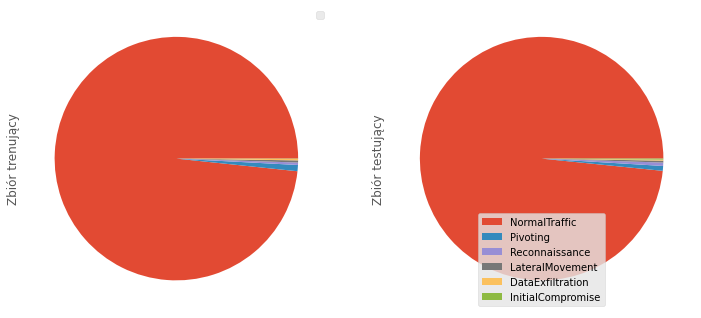

In [18]:
df.plot(kind = 'pie', subplots = 'True', labels = None)
plt.legend(loc=8, labels=df.index)

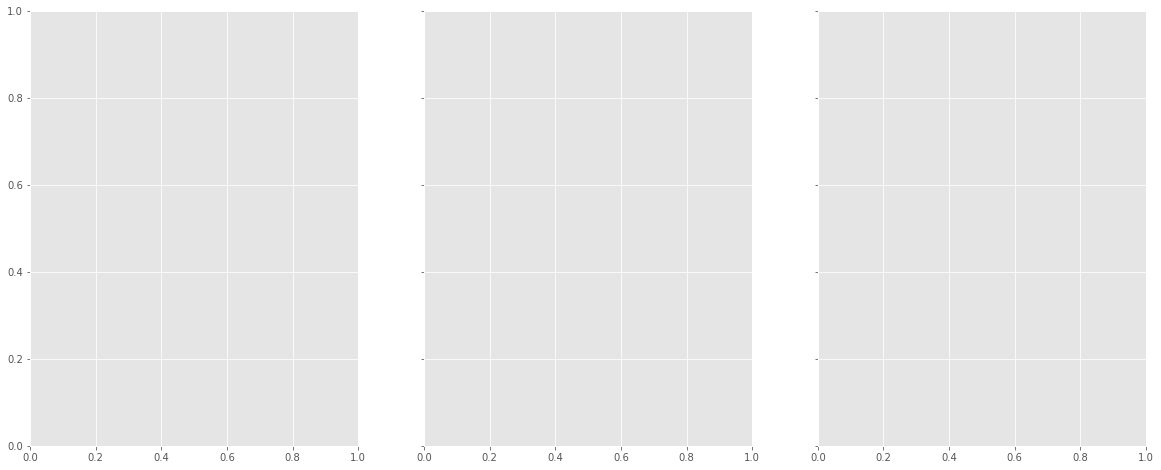

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharex = True, sharey = True)


In [20]:
df1 = df.drop('NormalTraffic')

Text(0.5, 0, 'Etykieta')

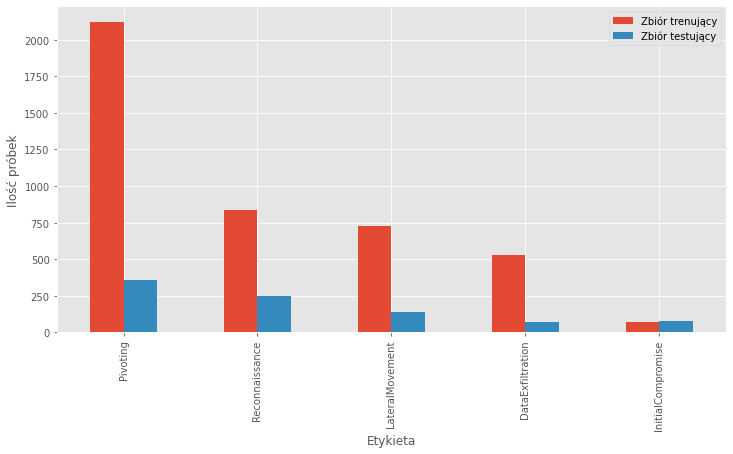

In [21]:
plt.style.use("ggplot")
df1.plot(kind = 'bar')
plt.ylabel('Ilość próbek')
plt.xlabel('Etykieta')

In [22]:
print('Label counts percentile\n')

print('\ntrain:\n')
print(train['Label'].value_counts(normalize = True))

print('\ntest:\n')
print(test['Label'].value_counts(normalize = True))

print('\ncombined:\n')
print(dataset['Label'].value_counts(normalize = True))

Label counts percentile


train:

NormalTraffic        0.983467
Pivoting             0.008189
Reconnaissance       0.003215
LateralMovement      0.002813
DataExfiltration     0.002034
InitialCompromise    0.000282
Name: Label, dtype: float64

test:

NormalTraffic        0.983996
Pivoting             0.006373
Reconnaissance       0.004444
LateralMovement      0.002514
InitialCompromise    0.001363
DataExfiltration     0.001310
Name: Label, dtype: float64

combined:

NormalTraffic        0.983562
Pivoting             0.007864
Reconnaissance       0.003435
LateralMovement      0.002760
DataExfiltration     0.001904
InitialCompromise    0.000475
Name: Label, dtype: float64


<ipython-input-23-1decad468473>:9: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc=0, labels=df.index, prop={'size': 11})


Text(0, 0.5, 'Etykieta kategorii')

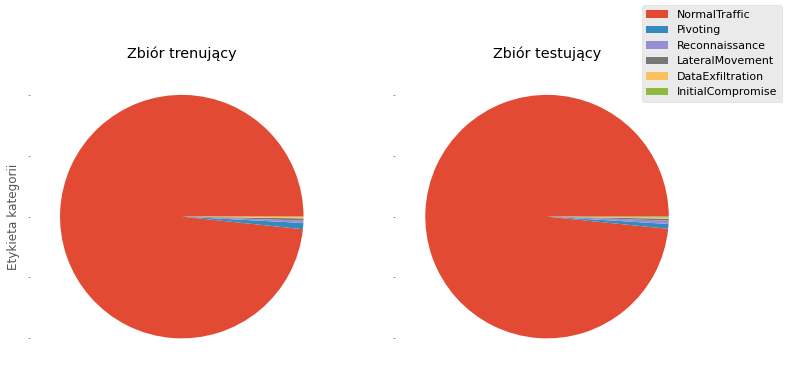

In [23]:
fig, axes = plt.subplots(1, 2, sharex = True, sharey = True)

axes[0].set_title('Zbiór trenujący')
train['Label'].value_counts().plot(ax = axes[0], kind = 'pie', labels = None)

axes[1].set_title('Zbiór testujący')
test['Label'].value_counts().plot(ax = axes[1], kind = 'pie', labels = None)

fig.legend(loc=0, labels=df.index, prop={'size': 11})

axes[0].set_ylabel('Etykieta kategorii')

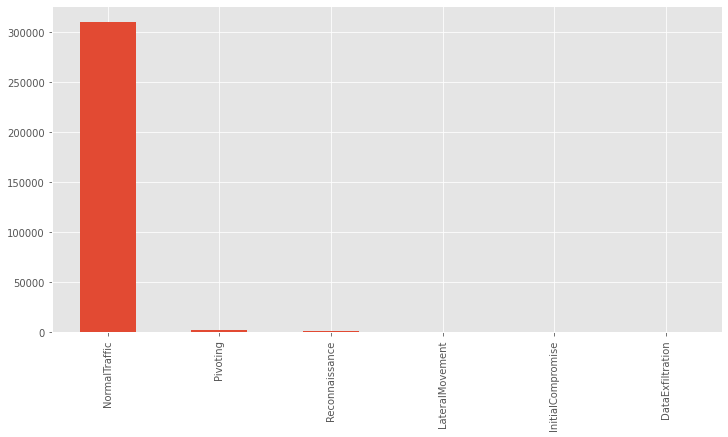

In [24]:
dataset['Label'].value_counts().plot(kind = 'bar')
train['Label'].value_counts().plot(kind = 'bar')
test['Label'].value_counts().plot(kind = 'bar')

plt.show()

In [25]:
#df = pd.merge(train, test, on='Label')

In [26]:
df.plot

In [27]:
type(dataset['Label'].value_counts())

pandas.core.series.Series

<BarContainer object of 4 artists>

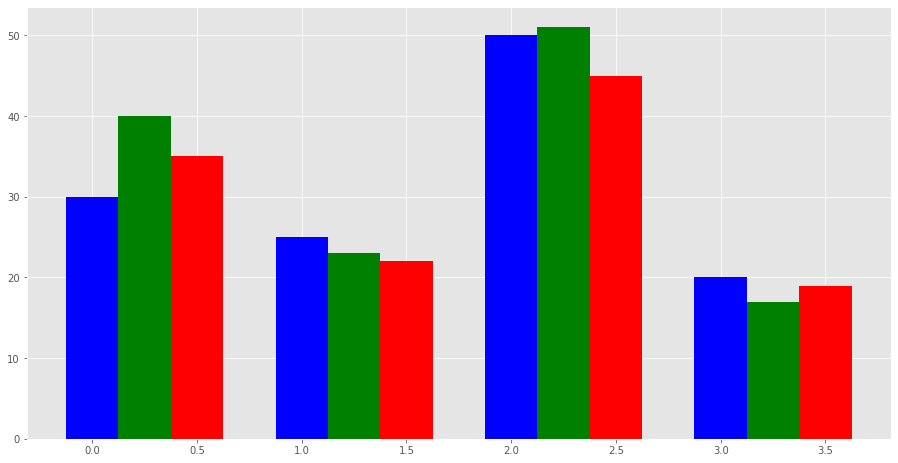

In [28]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

#### Flow ID

In [29]:
len(dataset['Flow ID'].unique())

101463

In [30]:
# jak czesto te same flow id sie powtarzaja
dataset['Flow ID'].value_counts().describe()

count    101462.000000
mean          3.110583
std         101.655972
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       25329.000000
Name: Flow ID, dtype: float64

#### Src IP/ Dst IP

In [31]:
len(dataset['Src IP'].unique())

100

In [32]:
dataset['Src IP'].value_counts().describe()

count       100.00000
mean       3156.07000
std       12059.60273
min           1.00000
25%           4.00000
50%          24.00000
75%         498.75000
max      108651.00000
Name: Src IP, dtype: float64

In [33]:
len(dataset['Dst IP'].unique())

167

In [34]:
dataset['Dst IP'].value_counts().describe()

count       167.000000
mean       1889.862275
std       10679.777800
min           1.000000
25%           2.000000
50%           4.000000
75%         332.000000
max      133992.000000
Name: Dst IP, dtype: float64

In [35]:
dataset.loc[dataset['Label'] == 'Reconnaissance']['Flow Duration'].min()

15

In [36]:
dataset.loc[dataset['Label'] == 'Reconnaissance']

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
80,172.28.128.10-172.28.128.11-52381-5500-6,172.28.128.10,52381,172.28.128.11,5500,6,2015-10-21 10:54:12,53906,3,2,...,20,0.0,0.0,0.0,0.0,1.602169e+15,0.000000e+00,1.602169e+15,1.602169e+15,Reconnaissance
161,172.28.128.10-172.28.128.11-52381-5500-6,172.28.128.10,52381,172.28.128.11,5500,6,2015-10-21 10:55:01,4999654,818,29,...,20,0.0,0.0,0.0,0.0,1.602169e+15,0.000000e+00,1.602169e+15,1.602169e+15,Reconnaissance
162,172.28.128.10-172.28.128.11-52381-5500-6,172.28.128.10,52381,172.28.128.11,5500,6,2015-10-21 10:55:07,4965007,13,9,...,20,60384.0,0.0,60384.0,60384.0,8.010845e+14,1.132904e+15,1.602169e+15,3.096129e+06,Reconnaissance
163,172.28.128.10-172.28.128.11-52381-5500-6,172.28.128.10,52381,172.28.128.11,5500,6,2015-10-21 10:55:13,59182,3,2,...,20,0.0,0.0,0.0,0.0,1.602169e+15,0.000000e+00,1.602169e+15,1.602169e+15,Reconnaissance
164,172.28.128.10-172.28.128.11-52381-5500-6,172.28.128.10,52381,172.28.128.11,5500,6,2015-10-21 10:56:01,429,1,2,...,20,0.0,0.0,0.0,0.0,1.602169e+15,0.000000e+00,1.602169e+15,1.602169e+15,Reconnaissance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53295,172.28.129.12-172.28.129.14-4488-36960-6,172.28.129.12,4488,172.28.129.14,36960,6,10/20/2015 22:56,827,2,0,...,32,0.0,0.0,0.0,0.0,1.602470e+15,0.000000e+00,1.602470e+15,1.602470e+15,Reconnaissance
54725,172.28.128.10-172.28.128.11-64715-5500-6,172.28.128.10,64715,172.28.128.11,5500,6,10/20/2015 23:01,3317738,562,20,...,20,1029.0,0.0,1029.0,1029.0,8.012360e+14,1.133120e+15,1.602470e+15,3.255209e+06,Reconnaissance
54730,172.28.128.10-172.28.128.11-64715-5500-6,172.28.128.10,64715,172.28.128.11,5500,6,10/20/2015 23:01,3317800,3,23,...,20,1476.0,0.0,1476.0,1476.0,8.012360e+14,1.133120e+15,1.602470e+15,3.254810e+06,Reconnaissance
54774,172.28.128.10-172.28.128.11-64715-5500-6,172.28.128.10,64715,172.28.128.11,5500,6,10/20/2015 23:01,53028,3,2,...,20,0.0,0.0,0.0,0.0,1.602470e+15,0.000000e+00,1.602470e+15,1.602470e+15,Reconnaissance


#### Timestamp
TODO: może da się zrobić histogram po prostu z obiektu typu datetime

In [37]:
# converting timestamp to a numerical value - TODO: currently Timestamps are dropped

def tryconvert(x):
  try: 
    return dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp()
  except:
    return dt.datetime.strptime(x, '%m/%d/%Y %H:%M').timestamp()

dataset['Timestamp'] = dataset['Timestamp'].apply(lambda x: tryconvert(x))

In [38]:
dataset['Timestamp'].describe()

count    3.156070e+05
mean     1.444405e+09
std      3.811095e+07
min      1.427340e+06
25%      1.445400e+09
50%      1.445412e+09
75%      1.445427e+09
max      1.445472e+09
Name: Timestamp, dtype: float64

In [39]:
dataset['Timestamp'].sort_values().head(250)

50434    1.427340e+06
50455    1.427340e+06
50456    1.427340e+06
50457    1.427340e+06
50458    1.427340e+06
             ...     
24       1.445340e+09
26       1.445340e+09
34       1.445340e+09
36       1.445340e+09
33       1.445340e+09
Name: Timestamp, Length: 250, dtype: float64

In [40]:
dataset.iloc[50435]

Flow ID      7C1A:6183:0806:0001:0800:0604:0001:0007-7C1A:6...
Src IP                 7C1A:6183:0806:0001:0800:0604:0001:0007
Src Port                                                     0
Dst IP                 7C1A:6183:C0A8:5801:0000:0000:0000:C0A8
Dst Port                                                     0
                                   ...                        
Idle Mean                                      1450000000000.0
Idle Std                                                   0.0
Idle Max                                       1450000000000.0
Idle Min                                       1450000000000.0
Label                                            NormalTraffic
Name: 50435, Length: 84, dtype: object

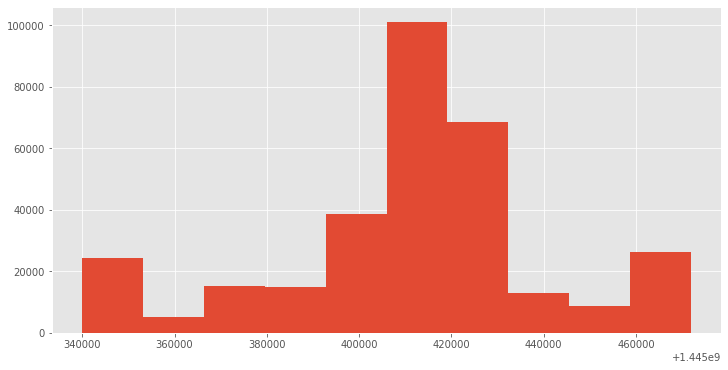

In [41]:
dataset['Timestamp'].hist(range = (1.445340e+09, dataset['Timestamp'].max())) #TODO: tymczasowa lewa granica range'a; do wyciagniecia jakas lepsza wartosc na to

### Numerical variables

In [42]:
# TODO: pobadac tu jakies zmienne na jakies podstawie nw..

## Study of the relationships between variables

In [43]:
# heatmap - ale: oddzielna heatmapa dla kazdego labela, wyfiltrowana po najwazniejszych zmiennych wybranych przez DF (bo jest tego za duzo aby wyrysowywac wszystkie)

In [44]:

dataset.dtypes.loc[(dataset.dtypes.values != float)]

Flow ID                object
Src IP                 object
Src Port                int64
Dst IP                 object
Dst Port                int64
Protocol                int64
Flow Duration           int64
Total Fwd Packet        int64
Total Bwd packets       int64
Fwd PSH Flags           int64
Bwd PSH Flags           int64
Fwd URG Flags           int64
Bwd URG Flags           int64
Fwd Header Length       int64
Bwd Header Length       int64
FIN Flag Count          int64
SYN Flag Count          int64
RST Flag Count          int64
PSH Flag Count          int64
ACK Flag Count          int64
URG Flag Count          int64
CWR Flag Count          int64
ECE Flag Count          int64
Fwd Bytes/Bulk Avg      int64
Fwd Packet/Bulk Avg     int64
Fwd Bulk Rate Avg       int64
Bwd Bytes/Bulk Avg      int64
Bwd Packet/Bulk Avg     int64
Bwd Bulk Rate Avg       int64
Subflow Fwd Packets     int64
Subflow Fwd Bytes       int64
Subflow Bwd Packets     int64
Subflow Bwd Bytes       int64
FWD Init W

In [45]:
# najpierw wyfiltruje to zgodnie z metoda bieniasza - wyrysuje cala matryce i pozniej bede zmiejszal jej wymiary dla najmniej skorelowanych zmiennych

# zrobic to jak tu: https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/
# https://medium.com/the-researchers-guide/generate-numerical-correlation-and-nominal-association-plots-using-python-c8548aa4a663

#dropping for testing purposes (associations function requirement)
test = test.replace(np.inf, None)
test = test.dropna().reset_index(drop = True)

#corrmat = test.corr()
corrmat = associations(test.drop(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Count', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Subflow Bwd Packets','Active Std'], axis = 1), cmap="Spectral_r", figsize=(50,50))


NameError: ignored

In [ ]:
dataset['Subflow Bwd Packets'].describe()

In [ ]:
test['Bwd IAT Mean'].describe()

In [ ]:
print(pd.__version__)